# **Tarea 3**

Bastián Ignacio Garcés Garcés

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
import time
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import sklearn.feature_selection

from skimage.feature import local_binary_pattern

from skimage.feature import hog

from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.densenet import preprocess_input

from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input as preprocess_input_resnet

In [ ]:
!gdown 1rhxNU8Vl5ttoW19MPokRKg6KUjt5AUHO #00000_C

Downloading...
From: https://drive.google.com/uc?id=1rhxNU8Vl5ttoW19MPokRKg6KUjt5AUHO
To: /content/00000.zip
100% 578M/578M [00:07<00:00, 73.6MB/s]


In [ ]:
!unzip '/content/00000.zip'

Archive:  /content/00000.zip
  inflating: 00000_C/01979_Mask.jpg  
  inflating: 00000_C/01771_Mask.jpg  
  inflating: 00000_C/01985_Mask.jpg  
  inflating: 00000_C/01999_Mask.jpg  
  inflating: 00000_C/01987_Mask.jpg  
  inflating: 00000_C/01942_Mask.jpg  
  inflating: 00000_C/01997_Mask.jpg  
  inflating: 00000_C/01898_Mask.jpg  
  inflating: 00000_C/01919_Mask.jpg  
  inflating: 00000_C/01983_Mask.jpg  
  inflating: 00000_C/01732_Mask.jpg  
  inflating: 00000_C/01860_Mask.jpg  
  inflating: 00000_C/01875_Mask.jpg  
  inflating: 00000_C/01980_Mask.jpg  
  inflating: 00000_C/01986_Mask.jpg  
  inflating: 00000_C/01982_Mask.jpg  
  inflating: 00000_C/01990_Mask.jpg  
  inflating: 00000_C/01995_Mask.jpg  
  inflating: 00000_C/01667_Mask.jpg  
  inflating: 00000_C/01788_Mask.jpg  
  inflating: 00000_C/01690_Mask.jpg  
  inflating: 00000_C/01970_Mask.jpg  
  inflating: 00000_C/01834_Mask.jpg  
  inflating: 00000_C/01881_Mask.jpg  
  inflating: 00000_C/01989_Mask.jpg  
  inflating: 00000_C/

In [ ]:
!gdown 1jxqaq6SZflHyzoCRv3CMX7BqzB0M3FwI #10000_W

Downloading...
From: https://drive.google.com/uc?id=1jxqaq6SZflHyzoCRv3CMX7BqzB0M3FwI
To: /content/10000.zip
100% 589M/589M [00:06<00:00, 88.1MB/s]


In [ ]:
!unzip '/content/10000.zip'

Archive:  /content/10000.zip
  inflating: 10000_W/10815_Mask_Chin.jpg  
  inflating: 10000_W/10888_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10810_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10851_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10997_Mask_Chin.jpg  
  inflating: 10000_W/10831_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10826_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10819_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10948_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10842_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10949_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10860_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10940_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10872_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10813_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10898_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10840_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10994_Mask_Mouth_Chin.jpg  
  inflating: 10000_W/10906_Mask_Nose_Mouth.jpg  
  inflating: 10000_W/10984_Mask_Mouth_Chin.jpg  
  i

In [ ]:
!gdown 1O0N8yrpX7aNOuAXAKqHlrhJuN6CmQkh6 #60000_N

Downloading...
From: https://drive.google.com/uc?id=1O0N8yrpX7aNOuAXAKqHlrhJuN6CmQkh6
To: /content/60000.zip
100% 2.15G/2.15G [00:24<00:00, 88.5MB/s]


In [ ]:
!unzip '/content/60000.zip'

Archive:  /content/60000.zip
  inflating: 60000_N/63479.png       
  inflating: 60000_N/63482.png       
  inflating: 60000_N/63835.png       
  inflating: 60000_N/63498.png       
  inflating: 60000_N/63489.png       
  inflating: 60000_N/63467.png       
  inflating: 60000_N/63480.png       
  inflating: 60000_N/63478.png       
  inflating: 60000_N/63890.png       
  inflating: 60000_N/63529.png       
  inflating: 60000_N/63484.png       
  inflating: 60000_N/63497.png       
  inflating: 60000_N/63472.png       
  inflating: 60000_N/63492.png       
  inflating: 60000_N/63487.png       
  inflating: 60000_N/63481.png       
  inflating: 60000_N/63486.png       
  inflating: 60000_N/63476.png       
  inflating: 60000_N/63491.png       
  inflating: 60000_N/63470.png       
  inflating: 60000_N/63494.png       
  inflating: 60000_N/63496.png       
  inflating: 60000_N/63495.png       
  inflating: 60000_N/63485.png       
  inflating: 60000_N/63499.png       
  inflating: 60000_N/

In [ ]:
!gdown 1BtKocE0srBibU83SaVBJAgpGNtviHw76 #FotosPropias.rar

Downloading...
From: https://drive.google.com/uc?id=1BtKocE0srBibU83SaVBJAgpGNtviHw76
To: /content/FotosPropias.rar
100% 379k/379k [00:00<00:00, 98.2MB/s]


In [ ]:
!unrar x 'FotosPropias.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from FotosPropias.rar

Creating    FotosPropias                                              OK
Extracting  FotosPropias/Bien puesta.jpeg                                 38%  OK 
Extracting  FotosPropias/Mal puesta.jpeg                                  70%  OK 
Extracting  FotosPropias/Sin mascarilla.jpeg                              99%  OK 
All OK


# Construcción DataFrame preliminar imágenes base de datos

In [ ]:
good_mask = os.listdir('/content/00000_C')
not_good_mask = os.listdir('/content/10000_W')
not_mask = os.listdir('/content/60000_N')
print(len(good_mask), len(not_good_mask), len(not_mask))

1912 1919 1569


Se definen las clases como sigue:

*   Clase 0: Mascarilla bien puesta
*   Clase 1: Mascarilla mal puesta
*   Clase 2: Sin mascarilla

In [ ]:
good_mask2 = pd.DataFrame()
for i in range(len(good_mask)):
  good_mask2[i] = [f'/content/00000_C/{good_mask[i]}', 0]
good_mask2 = good_mask2.transpose()

not_good_mask2 = pd.DataFrame()
for i in range(len(not_good_mask)):
  not_good_mask2[i] = [f'/content/10000_W/{not_good_mask[i]}', 1]
not_good_mask2 = not_good_mask2.transpose()

not_mask2 = pd.DataFrame()
for i in range(len(not_mask)):
  not_mask2[i] = [f'/content/60000_N/{not_mask[i]}', 2]
not_mask2 = not_mask2.transpose()

full_data = pd.concat([good_mask2, not_good_mask2, not_mask2], ignore_index = True)
full_data.columns = ['Path_photo', 'class']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [ ]:
full_data

,Path_photo,class
0,/content/00000_C/00251_Mask.jpg,0
1,/content/00000_C/01533_Mask.jpg,0
2,/content/00000_C/00065_Mask.jpg,0
3,/content/00000_C/01911_Mask.jpg,0
4,/content/00000_C/00263_Mask.jpg,0
...,...,...
5395,/content/60000_N/62733.png,2
5396,/content/60000_N/62100.png,2
5397,/content/60000_N/62896.png,2
5398,/content/60000_N/62266.png,2


# Construcción DataFrame preliminar imágenes propias

In [ ]:
FotosPropias = os.listdir('/content/FotosPropias')
print(len(FotosPropias))

3


In [ ]:
df_FotosPropias = pd.DataFrame()
for i in range(len(FotosPropias)):
  if FotosPropias[i][:4] == 'Bien':
    df_FotosPropias[i] = ['/content/FotosPropias/Bien puesta.jpeg', 0]
  elif FotosPropias[i][:3] == 'Mal':
    df_FotosPropias[i] = ['/content/FotosPropias/Mal puesta.jpeg', 1]
  elif FotosPropias[i][:3] == 'Sin':
    df_FotosPropias[i] = ['/content/FotosPropias/Sin mascarilla.jpeg', 2]
df_FotosPropias = df_FotosPropias.transpose()
df_FotosPropias.columns = ['Path_photo', 'class']

In [ ]:
df_FotosPropias

,Path_photo,class
0,/content/FotosPropias/Sin mascarilla.jpeg,2
1,/content/FotosPropias/Bien puesta.jpeg,0
2,/content/FotosPropias/Mal puesta.jpeg,1


# Extractores de características

In [ ]:
def LBP_sintraslape(foto_LBP, ancho, alto):
  '''
  La función LBP_sintraslape extrae un vector de características a partir
  de los histogramas extraidos de la división de la imagen en regiones 
  de tamaño anchoxalto sin traslape.

  Inputs:
    foto_LBP: imagen con LBP aplicado
    ancho: ancho de la región que divide la imagen de entrada
    alto: alto de la región que divide la imagen de entrada

  Outputs:
    histogramas: concatenación de los histogramas de cada región
  '''
  histogramas = np.array([])
  for i in range(foto_LBP.shape[0]//ancho): #filas
    for j in range(foto_LBP.shape[1]//alto): #columnas
      histogram, bin_edges = np.histogram(foto_LBP[i*alto:(i+1)*alto][j*ancho:(j+1)*ancho], bins=59)
      histogramas = np.concatenate((histogramas, histogram), axis=0)
  return histogramas

In [ ]:
def LBP(image_path):
  '''
  Función encargada de entregar el vector de característica correspondiente a una imagen
  mediante el uso del método LBP sin traslape.

  Inputs:
    image_path: path de la imagen a trabajar

  Outputs:
    features: vector de característica
  '''
  photo = cv2.imread(image_path, 0)
  photo = cv2.resize(photo, dsize=(photo.shape[0]//2, photo.shape[1]//2)) 
  photo = local_binary_pattern(photo, P = 8, R = 1)
  features = LBP_sintraslape(photo, photo.shape[0]//16, photo.shape[1]//16)
  return features

In [ ]:
DenseNet_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
ResNet_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
def feature_extractor(method, image_path):
  '''
  Función encargada de retornar un vector de característica de acuerdo al método
  deseado.

  Inputs:
    method: Método con el cual se quiere realizar la extracción de características,
    puede ser 'LBP', 'HOG', 'DenseNet' o 'ResNet'
    image_path: Path de la imagen a trabajar

  Outputs:
    features: Vector de características correspondiente
  '''
  if method == 'LBP':
    photo = cv2.imread(image_path, 0)
    photo = cv2.resize(photo, dsize=(photo.shape[0]//2, photo.shape[1]//2)) 
    photo = local_binary_pattern(photo, P = 8, R = 1)
    features = LBP_sintraslape(photo, photo.shape[0]//16, photo.shape[1]//16)
    
  elif method == 'HOG':
    photo = cv2.imread(image_path)
    photo = cv2.resize(photo, dsize=(1024,1024))
    features = hog(photo, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=False, multichannel=True)
    
  elif method == 'DenseNet':
    img = image.load_img(image_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = DenseNet_model.predict(x)
    features = features.flatten()
    features = features.tolist()

  elif method == 'ResNet':
    img = image.load_img(image_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_resnet(x)

    features = ResNet_model.predict(x)
    features = features.flatten()
    features = features.tolist()    
  
  return features

171458560/171446536 [==============================] - 1s 0us/step


# Extracción de características imágenes de la base de datos

In [ ]:
'''
features_LBP = pd.DataFrame()
t0 = time.time()
for i in range(full_data.shape[0]):
  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]
  features_LBP[i] = aux+feature_extractor('LBP', full_data.loc[i,'Path_photo']).tolist()
features_LBP = features_LBP.transpose() 
features_LBP.columns = ['Path_photo', 'class']+np.array(range(features_LBP.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_LBP = pd.DataFrame()\nt0 = time.time()\nfor i in range(full_data.shape[0]):\n  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]\n  features_LBP[i] = aux+feature_extractor('LBP', full_data.loc[i,'Path_photo']).tolist()\nfeatures_LBP = features_LBP.transpose() \nfeatures_LBP.columns = ['Path_photo', 'class']+np.array(range(features_LBP.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_LBP.to_csv('features_LBP.csv')

In [ ]:
'''
features_HOG = pd.DataFrame()
t0 = time.time()
for i in range(full_data.shape[0]):
  print(i)
  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]
  features_HOG[i] = aux+feature_extractor('HOG', full_data.loc[i,'Path_photo']).tolist()
features_HOG = features_HOG.transpose() 
features_HOG.columns = ['Path_photo', 'class']+np.array(range(features_HOG.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_HOG = pd.DataFrame()\nt0 = time.time()\nfor i in range(full_data.shape[0]):\n  print(i)\n  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]\n  features_HOG[i] = aux+feature_extractor('HOG', full_data.loc[i,'Path_photo']).tolist()\nfeatures_HOG = features_HOG.transpose() \nfeatures_HOG.columns = ['Path_photo', 'class']+np.array(range(features_HOG.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_HOG.to_csv('features_HOG.csv')

In [ ]:
'''
features_DenseNet = pd.DataFrame()
t0 = time.time()
for i in range(full_data.shape[0]):
  print(i)
  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]
  features_DenseNet[i] = aux+feature_extractor('DenseNet', full_data.loc[i,'Path_photo'])
features_DenseNet = features_DenseNet.transpose() 
features_DenseNet.columns = ['Path_photo', 'class']+np.array(range(features_DenseNet.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_DenseNet = pd.DataFrame()\nt0 = time.time()\nfor i in range(full_data.shape[0]):\n  print(i)\n  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]\n  features_DenseNet[i] = aux+feature_extractor('DenseNet', full_data.loc[i,'Path_photo'])\nfeatures_DenseNet = features_DenseNet.transpose() \nfeatures_DenseNet.columns = ['Path_photo', 'class']+np.array(range(features_DenseNet.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_DenseNet.to_csv('features_DenseNet.csv')

In [ ]:
'''
features_ResNet = pd.DataFrame()
t0 = time.time()
for i in range(full_data.shape[0]):
  print(i)
  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]
  features_ResNet[i] = aux+feature_extractor('ResNet', full_data.loc[i,'Path_photo'])
features_ResNet = features_ResNet.transpose() 
features_ResNet.columns = ['Path_photo', 'class']+np.array(range(features_ResNet.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_ResNet = pd.DataFrame()\nt0 = time.time()\nfor i in range(full_data.shape[0]):\n  print(i)\n  aux = [full_data.loc[i,'Path_photo'], full_data.loc[i,'class']]\n  features_ResNet[i] = aux+feature_extractor('ResNet', full_data.loc[i,'Path_photo'])\nfeatures_ResNet = features_ResNet.transpose() \nfeatures_ResNet.columns = ['Path_photo', 'class']+np.array(range(features_ResNet.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_ResNet.to_csv('features_ResNet.csv')

# Extracción de características Imágenes propias

In [ ]:
'''
features_LBP_propia = pd.DataFrame()
t0 = time.time()
for i in range(df_FotosPropias.shape[0]):
  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]
  features_LBP_propia[i] = aux+feature_extractor('LBP', df_FotosPropias.loc[i,'Path_photo']).tolist()
features_LBP_propia = features_LBP_propia.transpose() 
features_LBP_propia.columns = ['Path_photo', 'class']+np.array(range(features_LBP_propia.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_LBP_propia = pd.DataFrame()\nt0 = time.time()\nfor i in range(df_FotosPropias.shape[0]):\n  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]\n  features_LBP_propia[i] = aux+feature_extractor('LBP', df_FotosPropias.loc[i,'Path_photo']).tolist()\nfeatures_LBP_propia = features_LBP_propia.transpose() \nfeatures_LBP_propia.columns = ['Path_photo', 'class']+np.array(range(features_LBP_propia.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_LBP_propia.to_csv('features_LBP_propia.csv')

In [ ]:
'''
features_HOG_propia = pd.DataFrame()
t0 = time.time()
for i in range(df_FotosPropias.shape[0]):
  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]
  features_HOG_propia[i] = aux+feature_extractor('HOG', df_FotosPropias.loc[i,'Path_photo']).tolist()
features_HOG_propia = features_HOG_propia.transpose() 
features_HOG_propia.columns = ['Path_photo', 'class']+np.array(range(features_HOG_propia.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_HOG_propia = pd.DataFrame()\nt0 = time.time()\nfor i in range(df_FotosPropias.shape[0]):\n  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]\n  features_HOG_propia[i] = aux+feature_extractor('HOG', df_FotosPropias.loc[i,'Path_photo']).tolist()\nfeatures_HOG_propia = features_HOG_propia.transpose() \nfeatures_HOG_propia.columns = ['Path_photo', 'class']+np.array(range(features_HOG_propia.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_HOG_propia.to_csv('features_HOG_propia.csv')

In [ ]:
'''
features_DenseNet_propia = pd.DataFrame()
t0 = time.time()
for i in range(df_FotosPropias.shape[0]):
  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]
  features_DenseNet_propia[i] = aux+feature_extractor('DenseNet', df_FotosPropias.loc[i,'Path_photo'])
features_DenseNet_propia = features_DenseNet_propia.transpose() 
features_DenseNet_propia.columns = ['Path_photo', 'class']+np.array(range(features_DenseNet_propia.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_DenseNet_propia = pd.DataFrame()\nt0 = time.time()\nfor i in range(df_FotosPropias.shape[0]):\n  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]\n  features_DenseNet_propia[i] = aux+feature_extractor('DenseNet', df_FotosPropias.loc[i,'Path_photo'])\nfeatures_DenseNet_propia = features_DenseNet_propia.transpose() \nfeatures_DenseNet_propia.columns = ['Path_photo', 'class']+np.array(range(features_DenseNet_propia.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_DenseNet_propia.to_csv('features_DenseNet_propia.csv')

In [ ]:
'''
features_ResNet_propia = pd.DataFrame()
t0 = time.time()
for i in range(df_FotosPropias.shape[0]):
  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]
  features_ResNet_propia[i] = aux+feature_extractor('ResNet', df_FotosPropias.loc[i,'Path_photo'])
features_ResNet_propia = features_ResNet_propia.transpose() 
features_ResNet_propia.columns = ['Path_photo', 'class']+np.array(range(features_ResNet_propia.shape[1]-2)).tolist()
t1 = time.time()
print(t1-t0)
'''

"\nfeatures_ResNet_propia = pd.DataFrame()\nt0 = time.time()\nfor i in range(df_FotosPropias.shape[0]):\n  aux = [df_FotosPropias.loc[i,'Path_photo'], df_FotosPropias.loc[i,'class']]\n  features_ResNet_propia[i] = aux+feature_extractor('ResNet', df_FotosPropias.loc[i,'Path_photo'])\nfeatures_ResNet_propia = features_ResNet_propia.transpose() \nfeatures_ResNet_propia.columns = ['Path_photo', 'class']+np.array(range(features_ResNet_propia.shape[1]-2)).tolist()\nt1 = time.time()\nprint(t1-t0)\n"

In [ ]:
#features_ResNet_propia.to_csv('features_ResNet_propia.csv')

# Lectura de csv de características


In [ ]:
!gdown 1fkABJYjaenf3Cz2uxUlIsVB3_cu4oXCY #features_LBP.csv

Downloading...
From: https://drive.google.com/uc?id=1fkABJYjaenf3Cz2uxUlIsVB3_cu4oXCY
To: /content/features_LBP.csv
100% 334M/334M [00:02<00:00, 116MB/s]


In [ ]:
!gdown 1S5XsM9qTuRXTfHESB8cMEC4BqmAb4VrN #features_LBP_propia

Downloading...
From: https://drive.google.com/uc?id=1S5XsM9qTuRXTfHESB8cMEC4BqmAb4VrN
To: /content/features_LBP_propia.csv
100% 266k/266k [00:00<00:00, 75.7MB/s]


In [ ]:
!gdown 1PD-caYA-zkrdrPOvpRm1ljuphoGvYRoQ #features_HOG.csv

Downloading...
From: https://drive.google.com/uc?id=1PD-caYA-zkrdrPOvpRm1ljuphoGvYRoQ
To: /content/features_HOG_v2.csv
100% 858M/858M [00:07<00:00, 107MB/s]


In [ ]:
!gdown 1zQKiDcJhnrZvGaH5m1hDkdfq2yh5EVwN #features_HOG_propia.csv

Downloading...
From: https://drive.google.com/uc?id=1zQKiDcJhnrZvGaH5m1hDkdfq2yh5EVwN
To: /content/features_HOG_propia.csv
100% 516k/516k [00:00<00:00, 121MB/s]


In [ ]:
!gdown 1vNgrIEZ2w5E0RKJfkanhS0e-y0Dsk_-O #features_DenseNet.csv

Downloading...
From: https://drive.google.com/uc?id=1vNgrIEZ2w5E0RKJfkanhS0e-y0Dsk_-O
To: /content/features_DenseNet.csv
100% 216M/216M [00:02<00:00, 101MB/s] 


In [ ]:
!gdown 10Ci2-sC47n1pPMK5-y-55TnWeE1bqJ9Z #features_DenseNet_propia.csv

Downloading...
From: https://drive.google.com/uc?id=10Ci2-sC47n1pPMK5-y-55TnWeE1bqJ9Z
To: /content/features_DenseNet_propia.csv
100% 128k/128k [00:00<00:00, 60.0MB/s]


In [ ]:
!gdown 1Qi48GQl9ef-B5tfKhWvnLpRZYg-fQXcV #features_ResNet.csv

Downloading...
From: https://drive.google.com/uc?id=1Qi48GQl9ef-B5tfKhWvnLpRZYg-fQXcV
To: /content/features_ResNet.csv
100% 198M/198M [00:02<00:00, 89.9MB/s]


In [ ]:
!gdown 1R-Oij4B7D2Qu0b9ScrQaCpWnc-do-31X #features_ResNet_propia_csv

Downloading...
From: https://drive.google.com/uc?id=1R-Oij4B7D2Qu0b9ScrQaCpWnc-do-31X
To: /content/features_ResNet_propia.csv
100% 115k/115k [00:00<00:00, 57.3MB/s]


# Clasificación

In [ ]:
def Evaluation2(method):
  '''
  Función con la que se evalua el conjunto de prueba usando un método de extracción
  de característica determinado.
  Inputs:
    method: Método de extracción de característica a utilizar. Puede ser 'LBP', 'HOG',
    'DenseNet' y 'ResNet'

  Outpust:
    Vector[0][0]: predicción sobre imágenes propias
    Vector[0][1]: predicción sobre el conjunto de prueba
    Vector[1]: labels del conjunto de prueba
    Vector[2]: labels sobre imágenes propias
  '''
  #Lectura de csv dependiendo del método que se quiere testear
  if method == 'LBP':
    features_LBP = pd.read_csv('features_LBP.csv')
    features_LBP = features_LBP.drop(['Unnamed: 0'], axis=1)

    features = features_LBP.iloc[:, 2:]
    clases = features_LBP.iloc[:, 1]

    features_LBP_propio = pd.read_csv('features_LBP_propia.csv')
    features_LBP_propio = features_LBP_propio.drop(['Unnamed: 0'], axis=1)

    features_propio = features_LBP_propio.iloc[:, 2:]
    clases_propio = features_LBP_propio.iloc[:, 1]

  elif method == 'HOG':
    features_HOG = pd.read_csv('features_HOG_v2.csv')
    features_HOG = features_HOG.drop(['Unnamed: 0'], axis=1)

    features = features_HOG.iloc[:, 2:]
    clases = features_HOG.iloc[:, 1]

    features_HOG_propio = pd.read_csv('features_HOG_propia.csv')
    features_HOG_propio = features_HOG_propio.drop(['Unnamed: 0'], axis=1)

    features_propio = features_HOG_propio.iloc[:, 2:]
    clases_propio = features_HOG_propio.iloc[:, 1]

  elif method == 'DenseNet':
    features_DenseNet = pd.read_csv('features_DenseNet.csv')
    features_DenseNet = features_DenseNet.drop(['Unnamed: 0'], axis=1)

    features = features_DenseNet.iloc[:, 2:]
    clases = features_DenseNet.iloc[:, 1]

    features_DenseNet_propio = pd.read_csv('features_DenseNet_propia.csv')
    features_DenseNet_propio = features_DenseNet_propio.drop(['Unnamed: 0'], axis=1)

    features_propio = features_DenseNet_propio.iloc[:, 2:]
    clases_propio = features_DenseNet_propio.iloc[:, 1]

  elif method == 'ResNet':
    features_ResNet = pd.read_csv('features_ResNet.csv')
    features_ResNet = features_ResNet.drop(['Unnamed: 0'], axis=1)

    features = features_ResNet.iloc[:, 2:]
    clases = features_ResNet.iloc[:, 1]

    features_ResNet_propio = pd.read_csv('features_ResNet_propia.csv')
    features_ResNet_propio = features_ResNet_propio.drop(['Unnamed: 0'], axis=1)

    features_propio = features_ResNet_propio.iloc[:, 2:]
    clases_propio = features_ResNet_propio.iloc[:, 1]

  #Creación de conjuntos de entrenamiento, validación y prueba
  X_train, X_test, y_train, y_test = train_test_split(features, clases, test_size=0.3, random_state=42)
  X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

  #Normalizacion de caracteristicas
  scaler = sklearn.preprocessing.StandardScaler()

  scaler.fit(X_train)

  S_Entrena = scaler.transform(X_train)
  S_Vali = scaler.transform(X_vali)
  S_Prueba = scaler.transform(X_test)
  S_propio = scaler.transform(features_propio)

  #Concatenamos conjunto de entrenamiento y validacion para que lo use el grid
  Entrena_Vali = np.concatenate([S_Entrena, S_Vali])
  Entrena_Vali_class = np.concatenate([y_train, y_vali])

  #Vemos que indices del conjunto Entrena_Vali pertenecen al conjunto de entrenamiento
  index = np.zeros(X_train.shape[0]+X_vali.shape[0])
  for i in range(X_train.shape[0]):
    index[i] = -1

  #Definimos el predifinedSplit
  ps = sklearn.model_selection.PredefinedSplit(index)

  #-----------------------------------------------------------------------------
  #Random Forest que trabaja con todas las caracteristicas

  #Mediante un random forest
  Forest = sklearn.ensemble.RandomForestClassifier()
  #Definimos una grilla para seleccionar los hiperparametros
  GridForest = sklearn.model_selection.GridSearchCV(Forest, param_grid = {'n_estimators' : [150, 175, 200, 225, 250],
                                                                          'max_depth' : [9, 12, 15]}, cv=ps)

  GridForest.fit(Entrena_Vali, Entrena_Vali_class)

  param_Forest = GridForest.best_params_
  
  #Obtenemos el mejor estimador
  estim_Forest = GridForest.best_estimator_

  #Vemos la clasificacion del estimador sobre el conjunto de validacion
  predi_vali_Forest = estim_Forest.predict(S_Vali)

  #Accuracy del clasificador
  accuracy_Forest = sklearn.metrics.accuracy_score(y_vali, predi_vali_Forest)

  #Predicciones sobre conjunto de prueba y propio sin reducir caracteristicas
  predi_test_Forest = estim_Forest.predict(S_Prueba)
  predi_propio_Forest = estim_Forest.predict(S_propio)

  return [[predi_propio_Forest, predi_test_Forest], y_test, clases_propio]

## LBP

In [ ]:
t0 = time.time()
caso_LBP = Evaluation2('LBP')
t1 = time.time()
print('Tiempo de procesamiento:', str(t1-t0))

Tiempo de procesamiento: 184.04368805885315


El accuracy tras usar LBP es: 0.9123456790123456
Matriz de confusion al usar LBP


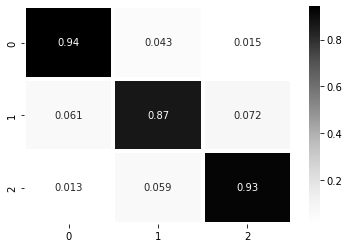

In [ ]:
accuracy_LBP = sklearn.metrics.accuracy_score(caso_LBP[1], caso_LBP[0][1])
print('El accuracy tras usar LBP es: '+str(accuracy_LBP))

Confu_LBP = sklearn.metrics.confusion_matrix(caso_LBP[0][1], caso_LBP[1], normalize='true')
print('Matriz de confusion al usar LBP')
sns.heatmap(Confu_LBP, linewidths=3, annot=True, cmap="Greys")

## HOG

In [ ]:
t0 = time.time()
caso_HOG = Evaluation2('HOG')
t1 = time.time()
print('Tiempo de procesamiento:', str(t1-t0))

Tiempo de procesamiento: 532.5942916870117


El accuracy tras usar HOG es: 0.9895061728395061
Matriz de confusion al usar HOG


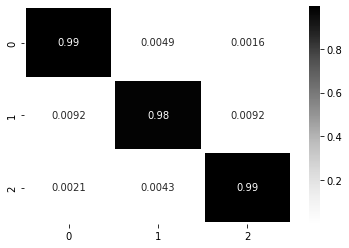

In [ ]:
accuracy_HOG = sklearn.metrics.accuracy_score(caso_HOG[1], caso_HOG[0][1])
print('El accuracy tras usar HOG es: '+str(accuracy_HOG))

Confu_HOG = sklearn.metrics.confusion_matrix(caso_HOG[0][1], caso_HOG[1], normalize='true')
print('Matriz de confusion al usar HOG')
sns.heatmap(Confu_HOG, linewidths=3, annot=True, cmap="Greys")

## DenseNet

In [ ]:
t0 = time.time()
caso_DenseNet = Evaluation2('DenseNet')
t1 = time.time()
print('Tiempo de procesamiento:', str(t1-t0))

Tiempo de procesamiento: 274.92656779289246


El accuracy tras usar DenseNet es: 0.975925925925926
Matriz de confusion al usar DenseNet


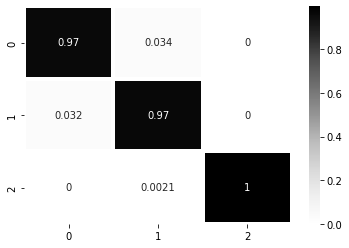

In [ ]:
accuracy_DenseNet = sklearn.metrics.accuracy_score(caso_DenseNet[1], caso_DenseNet[0][1])
print('El accuracy tras usar DenseNet es: '+str(accuracy_DenseNet))

Confu_DenseNet = sklearn.metrics.confusion_matrix(caso_DenseNet[0][1], caso_DenseNet[1], normalize='true')
print('Matriz de confusion al usar DenseNet')
sns.heatmap(Confu_DenseNet, linewidths=3, annot=True, cmap="Greys")

## ResNet

In [ ]:
t0 = time.time()
caso_ResNet = Evaluation2('ResNet')
t1 = time.time()
print('Tiempo de procesamiento:', str(t1-t0))

Tiempo de procesamiento: 264.8969945907593


El accuracy tras usar ResNet es: 0.9518518518518518
Matriz de confusion al usar ResNet


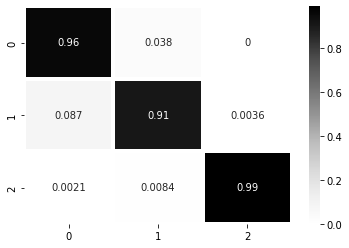

In [ ]:
accuracy_ResNet = sklearn.metrics.accuracy_score(caso_ResNet[1], caso_ResNet[0][1])
print('El accuracy tras usar ResNet es: '+str(accuracy_ResNet))

Confu_ResNet = sklearn.metrics.confusion_matrix(caso_ResNet[0][1], caso_ResNet[1], normalize='true')
print('Matriz de confusion al usar ResNet')
sns.heatmap(Confu_ResNet, linewidths=3, annot=True, cmap="Greys")

## Evaluación sobre imágenes propias

In [ ]:
accuracys = [accuracy_LBP, accuracy_HOG, accuracy_DenseNet, accuracy_ResNet]
predic_propia = [caso_LBP[0][0], caso_HOG[0][0], caso_DenseNet[0][0], caso_ResNet[0][0]]

In [ ]:
def Propio(index):
  '''
  Función encargada de entregar las predicciones sobre las imagenes propias.

  Inputs:
    index: indica el método a usar. 0 == LBP, 1 == HOG, 2 == DenseNet y 3 == ResNet
  '''
  if index == 0:
    print('El método elegido fue el LBP')
    
  elif index == 1:
    print('El método elegido fue el HOG')

  elif index == 2:
    print('El método elegido fue el DenseNet')

  elif index == 3:
    print('El método elegido fue el ResNet')

  predi_propio = predic_propia[index]
  print('')
  print('Las predicciones obtenidas son:', predi_propio)
  print('')
  print('Las predicciones reales son:', caso_LBP[2].tolist())
  print('')
  accuracy_mejormetodo = sklearn.metrics.accuracy_score(caso_LBP[2], predi_propio)
  print('El accuracy es: '+str(accuracy_mejormetodo))

  Confu = sklearn.metrics.confusion_matrix(predi_propio, caso_LBP[2], normalize='true')
  print('Matriz de confusion')
  sns.heatmap(Confu, linewidths=3, annot=True, cmap="Greys")

El método elegido fue el LBP

Las predicciones obtenidas son: [2 2 2]

Las predicciones reales son: [0, 2, 1]

El accuracy es: 0.3333333333333333
Matriz de confusion


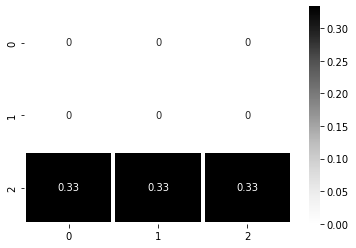

In [ ]:
Propio(0)

El método elegido fue el HOG

Las predicciones obtenidas son: [2 2 2]

Las predicciones reales son: [0, 2, 1]

El accuracy es: 0.3333333333333333
Matriz de confusion


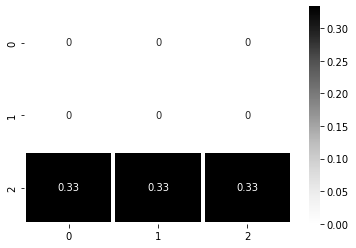

In [ ]:
Propio(1)

El método elegido fue el DenseNet

Las predicciones obtenidas son: [0 2 1]

Las predicciones reales son: [0, 2, 1]

El accuracy es: 1.0
Matriz de confusion


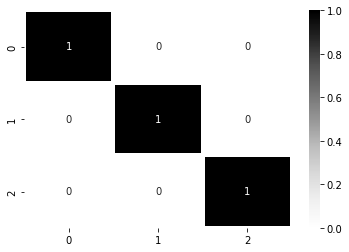

In [ ]:
Propio(2)

El método elegido fue el ResNet

Las predicciones obtenidas son: [0 2 1]

Las predicciones reales son: [0, 2, 1]

El accuracy es: 1.0
Matriz de confusion


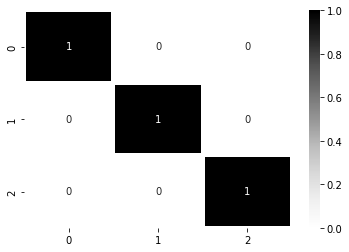

In [ ]:
Propio(3)